# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
print(app_train['DAYS_EMPLOYED'].describe())
app_train.head()

(307511, 122)
count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
print(app_train['DAYS_EMPLOYED'].describe())

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64


## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
#將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
app_train['YEARS_BIRTH'] = app_train['DAYS_BIRTH']/365
print(app_train['YEARS_BIRTH'].describe())
bins_cut = np.linspace(20,70,num=6)
app_train['YEARS_BIRTH_GROUP']=pd.cut(app_train['YEARS_BIRTH'], bins_cut)
app_train['YEARS_BIRTH_GROUP'].value_counts()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: YEARS_BIRTH, dtype: float64


(30.0, 40.0]    82308
(40.0, 50.0]    76541
(50.0, 60.0]    68062
(20.0, 30.0]    45021
(60.0, 70.0]    35579
Name: YEARS_BIRTH_GROUP, dtype: int64

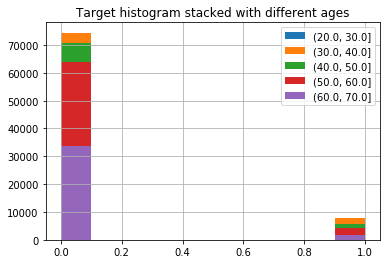

In [6]:
#繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖
YEARS_TARGET = app_train.groupby(['YEARS_BIRTH_GROUP'])['TARGET']
for k, v in YEARS_TARGET:
    v.hist(label=k)
plt.legend(loc="upper right")
plt.title('Target histogram stacked with different ages')
plt.show()

In [17]:
#受雇日數(DAYS_EMPLOYED)取絕對值 
app_train['DAYS_EMPLOYED'] = abs(app_train['DAYS_EMPLOYED'])
#將受雇日數除以365變成受雇幾年
app_train['YEARS_EMPLOYED'] = app_train['DAYS_EMPLOYED']/365
print(app_train['YEARS_EMPLOYED'].describe())
bins_cut = np.linspace(0,50,num=6)
app_train['YEARS_EMPLOYED_GROUP']=pd.cut(app_train['YEARS_EMPLOYED'], bins_cut, include_lowest = True)
app_train['YEARS_EMPLOYED_GROUP'].value_counts()

count    252137.000000
mean          6.531971
std           6.406466
min           0.000000
25%           2.101370
50%           4.515068
75%           8.698630
max          49.073973
Name: YEARS_EMPLOYED, dtype: float64


(-0.001, 10.0]    201183
(10.0, 20.0]       38398
(20.0, 30.0]        9551
(30.0, 40.0]        2771
(40.0, 50.0]         234
Name: YEARS_EMPLOYED_GROUP, dtype: int64

YEARS_EMPLOYED_GROUP
(-0.001, 10.0]    0.095396
(10.0, 20.0]      0.055133
(20.0, 30.0]      0.044917
(30.0, 40.0]      0.034645
(40.0, 50.0]      0.004274
Name: TARGET, dtype: float64


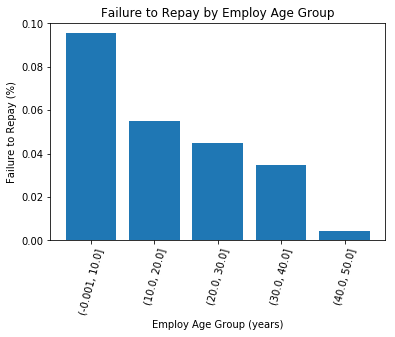

In [20]:
#繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖
employed_age_groups  = app_train.groupby('YEARS_EMPLOYED_GROUP').mean()
print(employed_age_groups['TARGET'].head())
year_group_sorted = app_train['YEARS_EMPLOYED_GROUP'].dropna().unique().sort_values(ascending = True)
px = np.arange(len(year_group_sorted))
py = employed_age_groups['TARGET']
plt.bar(px,py)
plt.xticks(px, year_group_sorted, rotation = 75); plt.xlabel('Employ Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Employ Age Group');